In [1]:
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

plt.rcParams['figure.figsize'] = 9, 9

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel("covid 19 cases in india.xlsx")



df

,S.No,State/UTs,Confirmed,Active,Recovered,Deceased
0,1,Andaman and Nicobar,33,0,33,0
1,2,Andhra Pradesh,1930,999,887,44
2,3,Arunachal Pradesh,1,0,1,0
3,4,Assam,63,27,34,2
4,5,Bihar,591,264,322,5
5,6,Chandigarh,169,143,24,2
6,7,Chhattisgarh,59,16,43,0
7,8,Dadra and Nagar Haveli,1,1,0,0
8,9,Delhi,6542,4449,2020,73
9,10,Goa,7,0,7,0


In [3]:
# checking for nan values
df.isna().sum()

S.No         0
State/UTs    0
Confirmed    0
Active       0
Recovered    0
Deceased     0
dtype: int64

In [4]:
df.shape

(33, 6)

In [5]:
# total no of confirmed cases in india till may 10 2020
df.Confirmed.sum()

62939

In [6]:
# total no of active cases in india till may 10 2020
df.Active.sum()

41472

In [7]:
# total no of recovered cases in india till may 10 2020
df.Recovered.sum()


19358

In [8]:
# total no of death cases in india till may 10 2020
df.Deceased.sum()

2109

In [9]:
df.style.background_gradient(cmap='Reds')

,S.No,State/UTs,Confirmed,Active,Recovered,Deceased
0,1,Andaman and Nicobar,33,0,33,0
1,2,Andhra Pradesh,1930,999,887,44
2,3,Arunachal Pradesh,1,0,1,0
3,4,Assam,63,27,34,2
4,5,Bihar,591,264,322,5
5,6,Chandigarh,169,143,24,2
6,7,Chhattisgarh,59,16,43,0
7,8,Dadra and Nagar Haveli,1,1,0,0
8,9,Delhi,6542,4449,2020,73
9,10,Goa,7,0,7,0


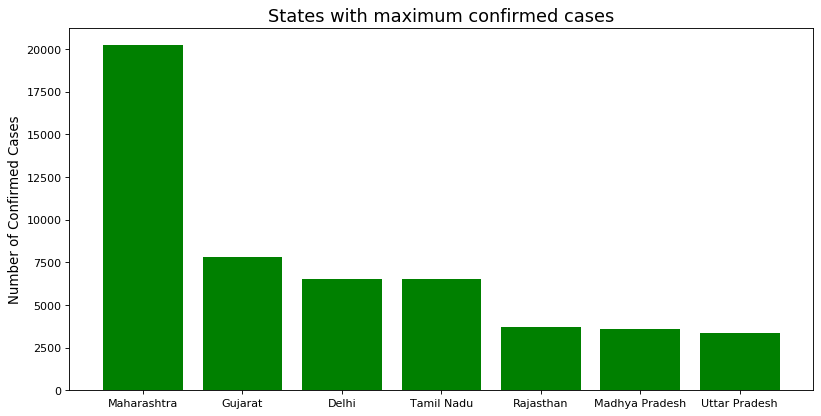

In [28]:
df3= df.copy()
df3= df3.sort_values(by=['Confirmed'], ascending = False)
plt.figure(figsize=(12,6), dpi=80)
plt.bar(df3['State/UTs'][:7],df3['Confirmed'][:7],
        align='center',color='green')
plt.ylabel('Number of Confirmed Cases', size = 12)
plt.title('States with maximum confirmed cases', size = 16)
plt.show()

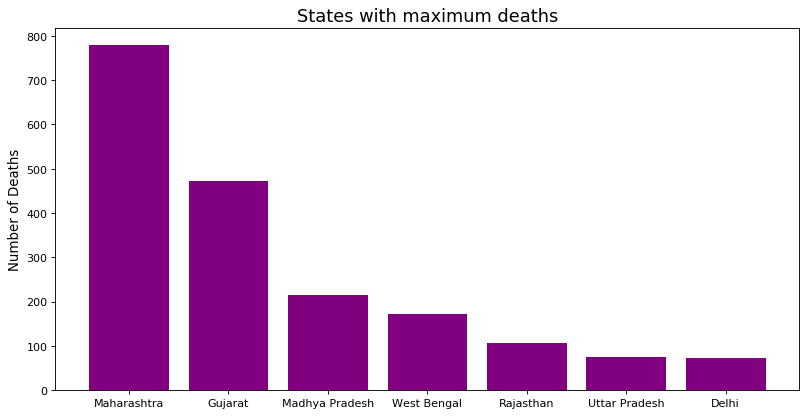

In [27]:
df4=df.copy()
df4 = df4.sort_values(by=['Deceased'], ascending = False)
plt.figure(figsize=(12,6), dpi=80)
plt.bar(df4['State/UTs'][:7], df4['Deceased'][:7], align='center',color='purple')
plt.ylabel('Number of Deaths', size = 12)
plt.title('States with maximum deaths', size = 16)
plt.show()

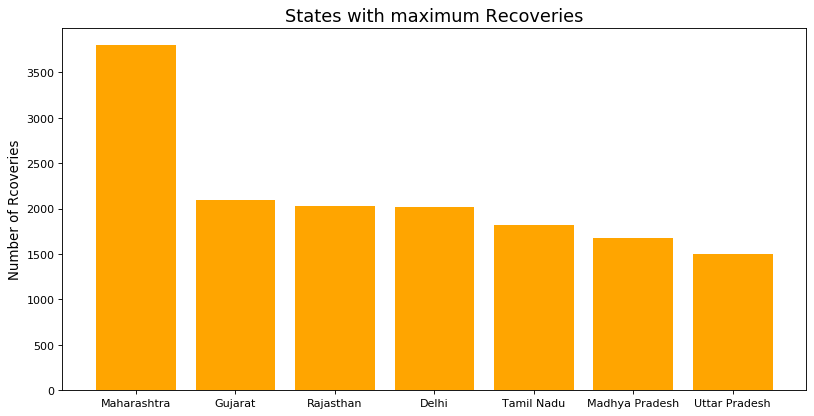

In [26]:
df5=df.copy()
df5 = df5.sort_values(by=['Recovered'], ascending = False)
plt.figure(figsize=(12,6), dpi=80)
plt.bar(df5['State/UTs'][:7], df5['Recovered'][:7], align='center',color='orange')
plt.ylabel('Number of Rcoveries', size = 12)
plt.title('States with maximum Recoveries', size = 16)
plt.show()

In [13]:
daf= pd.read_excel("indian population.xlsx")
daf

,State/UTs,Population
0,Andaman and Nicobar,419978
1,Andhra Pradesh,52883163
2,Arunachal Pradesh,1528296
3,Assam,31169272
4,Bihar,119461013
5,Chandigarh,1126705
6,Chhattisgarh,28566990
7,Dadra and Nagar Haveli,378979
8,Delhi,18345784
9,Goa,1542750


In [14]:
# merging data of covid 19 cases in india and population of india using pandas and create a new feature called 
#Cases/10 Million to gain some more idea on really which cases are more hit by the COVID-19 crisis.
#I feel this new measure is now a more level headed measure as it takes care of the population differences which exists
#between different states.




ddf = pd.merge(df,daf,on="State/UTs")
ddf['Cases/10million'] = (df['Confirmed']/ddf['Population'])*10000000
ddf.style.background_gradient(cmap='Reds')

,S.No,State/UTs,Confirmed,Active,Recovered,Deceased,Population,Cases/10million
0,1,Andaman and Nicobar,33,0,33,0,419978,785.755444
1,2,Andhra Pradesh,1930,999,887,44,52883163,364.955477
2,3,Arunachal Pradesh,1,0,1,0,1528296,6.543235
3,4,Assam,63,27,34,2,31169272,20.212214
4,5,Bihar,591,264,322,5,119461013,49.472207
5,6,Chandigarh,169,143,24,2,1126705,1499.948966
6,7,Chhattisgarh,59,16,43,0,28566990,20.653208
7,9,Delhi,6542,4449,2020,73,18345784,0.545084
8,10,Goa,7,0,7,0,1542750,42404.796629
9,11,Gujarat,7796,5233,2091,472,63907200,1.095338


In [15]:

#measure the progress of each state thereby helping to know that the measures taken by the respective state governments to 
#contain  the virus were successful or not. states with higher recovery rate and low fatality rate prove to have contain
#the virus and stopped it from causing further problems to the people.


#recovery rate
df['Recovery Rate'] = ((df['Recovered']/df['Confirmed'])*100)
df['Recovery Rate'] = [np.nan if x == float("inf") else x for x in df['Recovery Rate']]

#fatality rate
df['Fatality Rate'] = ((df['Deceased']/df['Confirmed'])*100)
df['Fatality Rate'] = [np.nan if x == float("inf") else x for x in df['Fatality Rate']]

df.style.background_gradient(cmap='Reds')

,S.No,State/UTs,Confirmed,Active,Recovered,Deceased,Recovery Rate,Fatality Rate
0,1,Andaman and Nicobar,33,0,33,0,100.000000,0.000000
1,2,Andhra Pradesh,1930,999,887,44,45.958549,2.279793
2,3,Arunachal Pradesh,1,0,1,0,100.000000,0.000000
3,4,Assam,63,27,34,2,53.968254,3.174603
4,5,Bihar,591,264,322,5,54.483926,0.846024
5,6,Chandigarh,169,143,24,2,14.201183,1.183432
6,7,Chhattisgarh,59,16,43,0,72.881356,0.000000
7,8,Dadra and Nagar Haveli,1,1,0,0,0.000000,0.000000
8,9,Delhi,6542,4449,2020,73,30.877408,1.115867
9,10,Goa,7,0,7,0,100.000000,0.000000


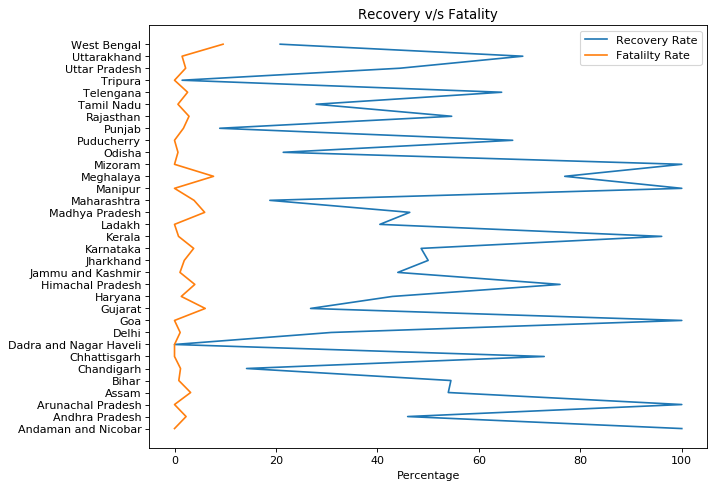

In [21]:
#ploting between recovery rate and fatality rate to know how much progress each state has made



plt.figure(figsize=(9,7), dpi=80)
plt.plot(df['Recovery Rate'],df['State/UTs'],)
plt.plot(df['Fatality Rate'],df['State/UTs'])
plt.legend(['Recovery Rate','Fatalilty Rate'],loc='upper right')
plt.xlabel('Percentage', size='10')
plt.title('Recovery v/s Fatality')
plt.show()

In [17]:
#worldwide data of covid 19 (last updated 10 may 2020)


df2= pd.read_excel("covid 19 world data.xlsx")
df2

,Country,Cases,Deaths,Cured
0,USA,1347309,80037,238078.0
1,Spain,262783,26478,173157.0
2,Italy,218268,30395,103031.0
3,UK,215260,31587,NaN
4,Russia,198676,1827,31916.0
...,...,...,...,...
209,Caribbean Netherlands,6,0,NaN
210,St. Barth,6,0,6.0
211,Western Sahara,6,0,5.0
212,Anguilla,3,0,3.0


In [18]:
#checking for nan values

df2.isna().sum()

Country    0
Cases      0
Deaths     0
Cured      7
dtype: int64

In [19]:
total_cases = df2.Cases.sum()
total_deaths = df2.Deaths.sum()
total_cured = df2.Cured.sum()
print("global cases = ",total_cases)
print("worlwide deaths = ", total_deaths)
print("worldwide cured = ", total_cured)

global cases =  4101536
worlwide deaths =  280435
worldwide cured =  1441123.0
